 ## 多层感知机
 
 多层感知机（multilayer perceptron，MLP）为例，介绍多层神经网络的概念。
 
 其实 就是 Linear + 激活函数  + 好几层 就叫MLP
 ## 激活函数

上述问题的根源在于全连接层只是对数据做仿射变换（affine transformation），而多个仿射变换的叠加仍然是一个仿射变换。解决问题的一个方法是引入非线性变换，例如对隐藏变量使用按元素运算的非线性函数进行变换，然后再作为下一个全连接层的输入。这个非线性函数被称为激活函数（activation function）。下面我们介绍几个常用的激活函数。

### 3.8.2.1 ReLU函数

ReLU（rectified linear unit）函数提供了一个很简单的非线性变换。给定元素$x$，该函数定义为

$$\text{ReLU}(x) = \max(x, 0).$$

可以看出，ReLU函数只保留正数元素，并将负数元素清零。为了直观地观察这一非线性变换，我们先定义一个绘图函数`xyplot`。

In [1]:
%matplotlib inline
import torch
import numpy as np
import matplotlib.pylab as plt

import sys
sys.path.append("..") 

import dl_utils


In [2]:
def xyplot(x_vals, y_vals, name):
    dl_utils.set_figsize(figsize=(5, 2.5))
    dl_utils.plt.plot(x_vals.detach().numpy(), y_vals.detach().numpy())
    dl_utils.plt.xlabel('x')
    dl_utils.plt.ylabel(name + '(x)')

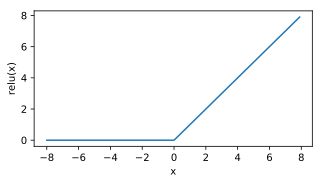

In [3]:
x = torch.arange(-8.0, 8.0, 0.1, requires_grad=True)
y = x.relu()
xyplot(x, y, 'relu')
#我们接下来通过`NDArray`提供的`relu`函数来绘制ReLU函数。可以看到，该激活函数是一个两段线性函数。

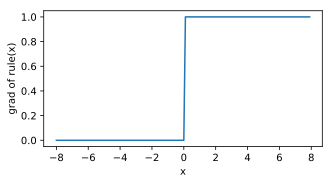

In [4]:
y.sum().backward()
xyplot(x, x.grad, 'grad of rule')

### sigmoid函数

sigmoid函数可以将元素的值变换到0和1之间：

$$\text{sigmoid}(x) = \frac{1}{1 + \exp(-x)}.$$

sigmoid函数在早期的神经网络中较为普遍，但它目前逐渐被更简单的ReLU函数取代。

依据链式法则，sigmoid函数的导数

$$\text{sigmoid}'(x) = \text{sigmoid}(x)\left(1-\text{sigmoid}(x)\right).$$



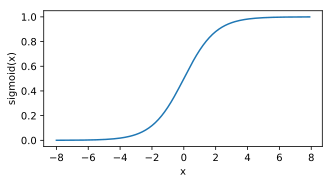

In [5]:
y = x.sigmoid()
xyplot(x, y, 'sigmoid')

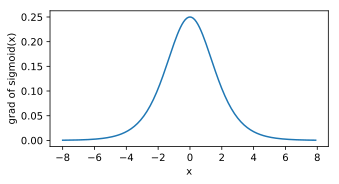

In [6]:
x.grad.zero_()
y.sum().backward()
xyplot(x, x.grad, 'grad of sigmoid')

###  tanh函数

tanh（双曲正切）函数可以将元素的值变换到-1和1之间：

$$\text{tanh}(x) = \frac{1 - \exp(-2x)}{1 + \exp(-2x)}.$$

我们接着绘制tanh函数。当输入接近0时，tanh函数接近线性变换。虽然该函数的形状和sigmoid函数的形状很像，但tanh函数在坐标系的原点上对称。

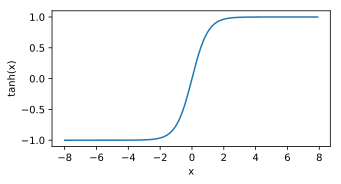

In [7]:
y = x.tanh()
xyplot(x, y, 'tanh')

依据链式法则，tanh函数的导数

$$\text{tanh}'(x) = 1 - \text{tanh}^2(x).$$

下面绘制了tanh函数的导数。当输入为0时，tanh函数的导数达到最大值1；当输入越偏离0时，tanh函数的导数越接近0。

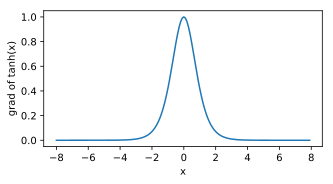

In [8]:
x.grad.zero_()
y.sum().backward()
xyplot(x, x.grad, 'grad of tanh')

## 多层感知机

多层感知机就是含有至少一个隐藏层的由全连接层组成的神经网络，且每个隐藏层的输出通过激活函数进行变换。多层感知机的层数和各隐藏层中隐藏单元个数都是超参数。以单隐藏层为例并沿用本节之前定义的符号，多层感知机按以下方式计算输出：
$$
\begin{aligned}
\boldsymbol{H} &= \phi(\boldsymbol{X} \boldsymbol{W}_h + \boldsymbol{b}_h),\\
\boldsymbol{O} &= \boldsymbol{H} \boldsymbol{W}_o + \boldsymbol{b}_o,
\end{aligned}
$$
其中$\phi$表示激活函数。在分类问题中，我们可以对输出$\boldsymbol{O}$做softmax运算，并使用softmax回归中的交叉熵损失函数。
在回归问题中，我们将输出层的输出个数设为1，并将输出$\boldsymbol{O}$直接提供给线性回归中使用的平方损失函数。



## 小结

- 多层感知机在输出层与输入层之间加入了一个或多个全连接隐藏层，并通过激活函数对隐藏层输出进行变换。
- 常用的激活函数包括ReLU函数、sigmoid函数和tanh函数。

# 多层感知机的从零开始实现

这里继续使用Fashion-MNIST数据集。我们将使用多层感知机对图像进行分类。


In [9]:
batch_size = 256
train_iter, test_iter = dl_utils.load_data_fashion_mnist(batch_size)

num_inputs, num_outputs, num_hiddens = 784, 10, 256

W1 = torch.tensor(np.random.normal(0, 0.01, (num_inputs, num_hiddens)), dtype=torch.float)
b1 = torch.zeros(num_hiddens, dtype=torch.float)
W2 = torch.tensor(np.random.normal(0, 0.01, (num_hiddens, num_outputs)), dtype=torch.float)
b2 = torch.zeros(num_outputs, dtype=torch.float)

params = [W1, b1, W2, b2]

for param in params:
    param.requires_grad_(requires_grad=True)

def relu(x):
    return torch.max(x, torch.tensor(0.0))


In [10]:
#模型定义
def net(x):
    x = x.view(x.shape[0],-1)
    x = torch.mm(x, W1) + b1
    x = relu(x)
    return(torch.mm(x, W2) + b2)

input_test = torch.randn((32,1,28,28))
print(net(input_test).shape)

torch.Size([32, 10])


In [11]:
loss = torch.nn.CrossEntropyLoss()
#我们直接使用PyTorch提供的包括softmax运算和交叉熵损失计算的函数。

In [12]:
from imp import reload
reload(dl_utils)
num_epochs, lr = 5, 100.0
batch_size = 256
dl_utils.train_classification_net(net, train_iter, test_iter, loss, num_epochs, batch_size, params, lr)

batch_size :256
epoch 1, loss 0.0030, train acc 0.713, test acc 0.785
epoch 2, loss 0.0019, train acc 0.822, test acc 0.806
epoch 3, loss 0.0017, train acc 0.847, test acc 0.847
epoch 4, loss 0.0015, train acc 0.853, test acc 0.837
epoch 5, loss 0.0015, train acc 0.864, test acc 0.832


>注：由于原书的mxnet中的`SoftmaxCrossEntropyLoss`在反向传播的时候相对于沿batch维求和了，而PyTorch默认的是求平均，所以用PyTorch计算得到的loss比mxnet小很多（大概是maxnet计算得到的1/batch_size这个量级），所以反向传播得到的梯度也小很多，所以为了得到差不多的学习效果，我们把学习率调得成原书的约batch_size倍，原书的学习率为0.5，这里设置成100.0。(之所以这么大，应该是因为d2lzh_pytorch里面的sgd函数在更新的时候除以了batch_size，其实PyTorch在计算loss的时候已经除过一次了，sgd这里应该不用除了)

## 小结

- 可以通过手动定义模型及其参数来实现简单的多层感知机。
- 当多层感知机的层数较多时，本节的实现方法会显得较烦琐，例如在定义模型参数的时候。

## Pytorch MLP

1、模型建立方式

第一种写法：
nn.Sequential()对象.add_module(层名，层class的实例）
```python
net1 = nn.Sequential()

net1.add_module('conv', nn.Conv2d(3, 3, 3))

net1.add_module('batchnorm', nn.BatchNorm2d(3))

net1.add_module('activation_layer', nn.ReLU())

```

 第二种写法：
nn.Sequential(*多个层class的实例)

```python

net2 = nn.Sequential(

        nn.Conv2d(3, 3, 3),

        nn.BatchNorm2d(3),

        nn.ReLU()

        )

```

第三种写法：

```python
nn.Sequential(OrderedDict([*多个(层名，层class的实例)]))


from collections import OrderedDict

net3= nn.Sequential(OrderedDict([

          ('conv', nn.Conv2d(3, 3, 3)),

          ('batchnorm', nn.BatchNorm2d(3)),

          ('activation_layer', nn.ReLU())

        ]))
 ```

In [13]:
import torch
from torch import nn
from torch.nn import init
import torch.nn.functional as F
import numpy as np

In [22]:
class MLP(nn.Module):
    def __init__(self, input_num, hidden):
        super(MLP,self).__init__()
        self.lin = nn.Linear(input_num, hidden[0])
        self.modellist = nn.ModuleList()
        
        if len(hidden) > 2:
            for index,hidden_in in enumerate(hidden[0:len(hidden)-2]):
                self.modellist.append(nn.Linear(hidden_in, hidden[index+1]))
                self.modellist.append(nn.ReLU())

        self.out = nn.Linear(hidden[len(hidden)-2], hidden[-1])
        
    def forward(self, x):
        x = x.view(x.shape[0], -1)

        x = self.lin(x)

        x = F.relu(x)
        
        for module in self.modellist:
            x = module(x)

        x = self.out(x)

        return x
        
           

    
input_num = 28*28
hidden_num = [256,64,10]

input_test = torch.randn((16,1,28,28))
net = MLP(input_num, hidden_num)
for params in net.parameters():
    init.normal_(params, mean=0, std=0.01)
    
    
print(net)
print(input_test.size())
print(net(input_test).size())

MLP(
  (lin): Linear(in_features=784, out_features=256, bias=True)
  (modellist): ModuleList(
    (0): Linear(in_features=256, out_features=64, bias=True)
    (1): ReLU()
  )
  (out): Linear(in_features=64, out_features=10, bias=True)
)
torch.Size([16, 1, 28, 28])
torch.Size([16, 10])


In [23]:
modellist=nn.ModuleList([nn.Linear(3,4), nn.ReLU(), nn.Linear(4,2)])
input=torch.randn(1,3)
for model in modellist:
    input=model(input)

In [24]:
hidden = [1,3,4,5,6]
for index,hidden_in in enumerate(hidden[0:len(hidden)-1]):
    print(hidden_in , hidden[index+1])

1 3
3 4
4 5
5 6


我们使用与3.7节中训练softmax回归几乎相同的步骤来读取数据并训练模型。

> 注：由于这里使用的是PyTorch的SGD而不是d2lzh_pytorch里面的sgd，所以就不存在3.9节那样学习率看起来很大的问题了。

In [25]:
batch_size = 256
train_iter, test_iter = dl_utils.load_data_fashion_mnist(batch_size)
net = MLP(input_num, hidden_num)
loss = torch.nn.CrossEntropyLoss()
optimizer = torch.optim.SGD(net.parameters(), lr = 0.5)
num_epochs = 10

dl_utils.train_classification_net(net, train_iter, test_iter, loss, num_epochs, batch_size, None, None, optimizer)


batch_size :256
epoch 1, loss 0.0038, train acc 0.638, test acc 0.750
epoch 2, loss 0.0021, train acc 0.803, test acc 0.825
epoch 3, loss 0.0017, train acc 0.835, test acc 0.843
epoch 4, loss 0.0016, train acc 0.847, test acc 0.820
epoch 5, loss 0.0015, train acc 0.857, test acc 0.842
epoch 6, loss 0.0014, train acc 0.869, test acc 0.822
epoch 7, loss 0.0013, train acc 0.872, test acc 0.857
epoch 8, loss 0.0013, train acc 0.878, test acc 0.817
epoch 9, loss 0.0012, train acc 0.882, test acc 0.861
epoch 10, loss 0.0012, train acc 0.887, test acc 0.861


epoch 1, loss 0.0090, train acc 0.103, test acc 0.183
epoch 2, loss 0.0064, train acc 0.337, test acc 0.393
epoch 3, loss 0.0035, train acc 0.628, test acc 0.745
epoch 4, loss 0.0024, train acc 0.774, test acc 0.801
epoch 5, loss 0.0020, train acc 0.815, test acc 0.816
epoch 6, loss 0.0018, train acc 0.835, test acc 0.782
epoch 7, loss 6275.1110, train acc 0.377, test acc 0.100
epoch 8, loss 0.0090, train acc 0.098, test acc 0.100
epoch 9, loss 0.0090, train acc 0.099, test acc 0.100
epoch 10, loss 0.0090, train acc 0.099, test acc 0.100